In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset

### TSK data

ok
ok


Text(0.5, 1.0, 'local noon TSK difference at Day 10 (Xingu Exp)')

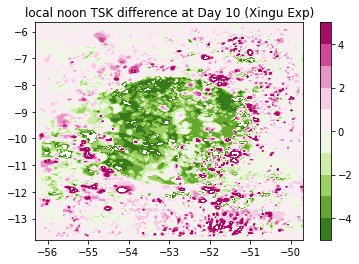

In [15]:
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
year='2003'
with xarray.open_dataset(path+'Xingu_'+year+'/3Dfields_d01_'+year+'-11-10_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
#with xarray.open_dataset(path+'Xingu_2015_bigclearing/energyflux_d01_2015-11-10_00:00:00',decode_times=False,
#                         mask_and_scale='True') as ds1:
#        print('ok')
with xarray.open_dataset(path+'Xingu_'+year+'_bigclearing/3Dfields_d01_'+year+'-11-10_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')

plt.contourf(lons,lats,ds1['TSK'][15,:,:]-ds0['TSK'][15,:,:],levels=np.arange(-5,6,1),cmap='PiYG_r')
plt.colorbar()
plt.title('local noon TSK difference at Day 10 (Xingu Exp)')

ok
ok


Text(0.5, 1.0, 'Forests are removed')

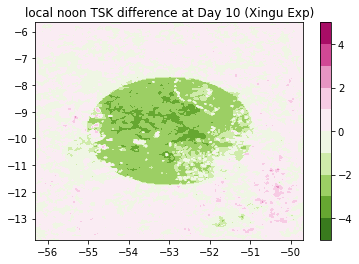

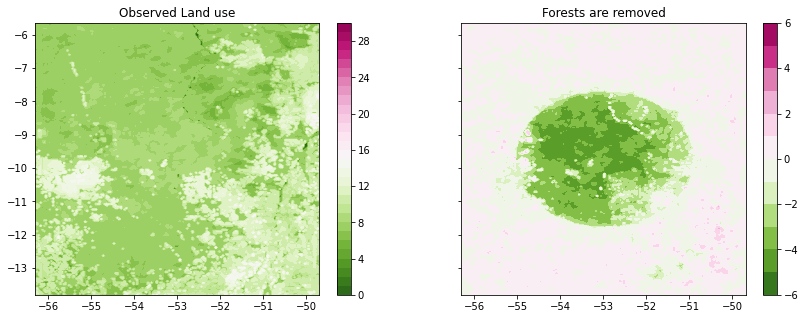

In [30]:
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
with xarray.open_dataset(path+'post_processing/TSK.obs.multiday.ensmean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
with xarray.open_dataset(path+'post_processing/TSK.bigclearing.multiday.ensmean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')
        
with xarray.open_dataset(path+'Xingu_2003/wrfout_d01_2003-07-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,:,:]
    lons = ds['XLONG'][0,:,:]
plt.contourf(lons,lats,ds1['TSK'][16,:,:]-ds0['TSK'][16,:,:],levels=np.arange(-5,6,1),cmap='PiYG_r')
plt.colorbar()
plt.title('local noon TSK difference at Day 10 (Xingu Exp)')



### change in TSK day range
range0 = ds0['TSK'][16,:,:]-ds0['TSK'][10,:,:]
range1 = ds1['TSK'][16,:,:]-ds1['TSK'][10,:,:]

fig,axes = plt.subplots(1,2,figsize=(14,5),sharex=True,sharey=True)
axes = axes.ravel()
im0=axes[0].contourf(lons,lats,range0, levels=np.arange(0,31,1),cmap='PiYG_r')
im1=axes[1].contourf(lons,lats,range1-range0, levels=np.arange(-6,7,1),cmap='PiYG_r')
fig.colorbar(im0,ax=axes[0])
fig.colorbar(im1,ax=axes[1])

axes[0].set_title('Observed Land use')
axes[1].set_title('Forests are removed')

In [6]:
ds1

<xarray.Dataset>
Dimensions:  (Time: 24, south_north: 200, west_east: 160)
Dimensions without coordinates: Time, south_north, west_east
Data variables:
    TSK      (Time, south_north, west_east) float32 ...
Attributes: (12/87)
    TITLE:                            OUTPUT FROM WRF V4.2 MODEL
    START_DATE:                      2003-07-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        161
    SOUTH-NORTH_GRID_DIMENSION:      201
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    history:                         Tue Apr  5 13:57:08 2022: ncea -O TSK.20...
    NCO:                             netCDF Operators version 5.0.1 (Homepage...

In [8]:
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
with xarray.open_dataset(path+'post_processing/TSK.obs.ensmean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
with xarray.open_dataset(path+'post_processing/TSK.bigclearing.ensmean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')
with xarray.open_dataset(path+'post_processing/TSK.mediumclearing.ensmean.nc',decode_times=False,
                         mask_and_scale='True') as ds2:
        print('ok')
with xarray.open_dataset(path+'post_processing/TSK.smallclearing.ensmean.nc',decode_times=False,
                         mask_and_scale='True') as ds3:
        print('ok')
        

with xarray.open_dataset(path+'Xingu_2003/wrfout_d01_2003-07-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,:,:]
    lons = ds['XLONG'][0,:,:]


ok
ok
ok
ok


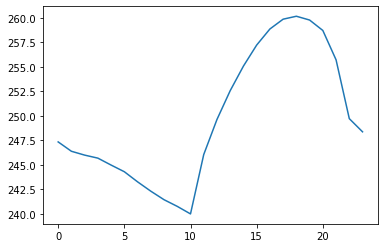

In [4]:
plt.plot(ds0['TSK'][:,50,50])

### TSK

Text(0.5, 1.0, 'Forests are removed')

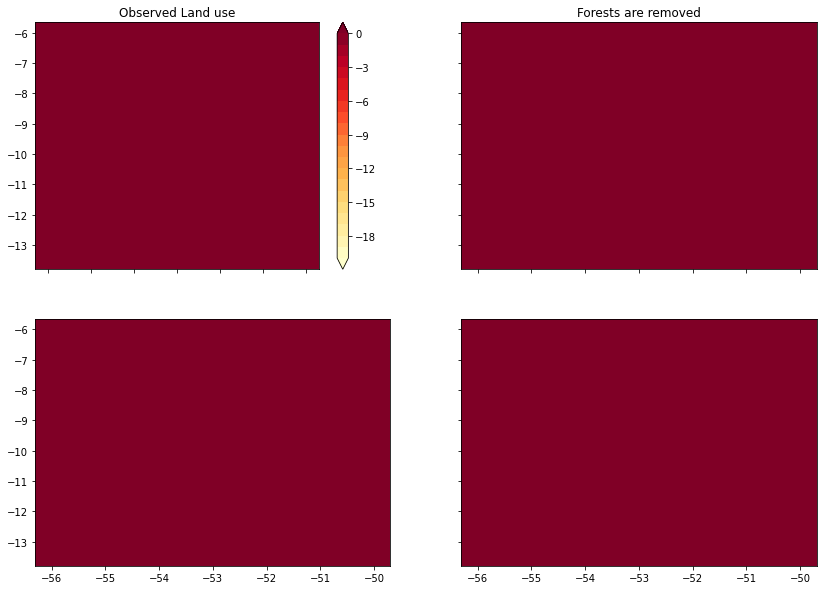

In [9]:
fig,axes = plt.subplots(2,2,figsize=(14,10),sharex=True,sharey=True)
axes = axes.ravel()
im=axes[0].contourf(lons,lats,ds0['TSK'][16,:,:]-273.15, levels=np.arange(-20,1,1),cmap='YlOrRd',extend='both')
axes[1].contourf(lons,lats,ds1['TSK'][16,:,:]-273.15, levels=np.arange(-20,1,1),cmap='YlOrRd',extend='both')
axes[2].contourf(lons,lats,ds2['TSK'][16,:,:]-273.15, levels=np.arange(-20,1,1),cmap='YlOrRd',extend='both')
axes[3].contourf(lons,lats,ds3['TSK'][16,:,:]-273.15, levels=np.arange(-20,1,1),cmap='YlOrRd',extend='both')
fig.colorbar(im,ax=axes[0])
axes[0].set_title('Observed Land use')
axes[1].set_title('Forests are removed')

### Changes in TSK

Text(0.5, 1.0, 'Forests are removed')

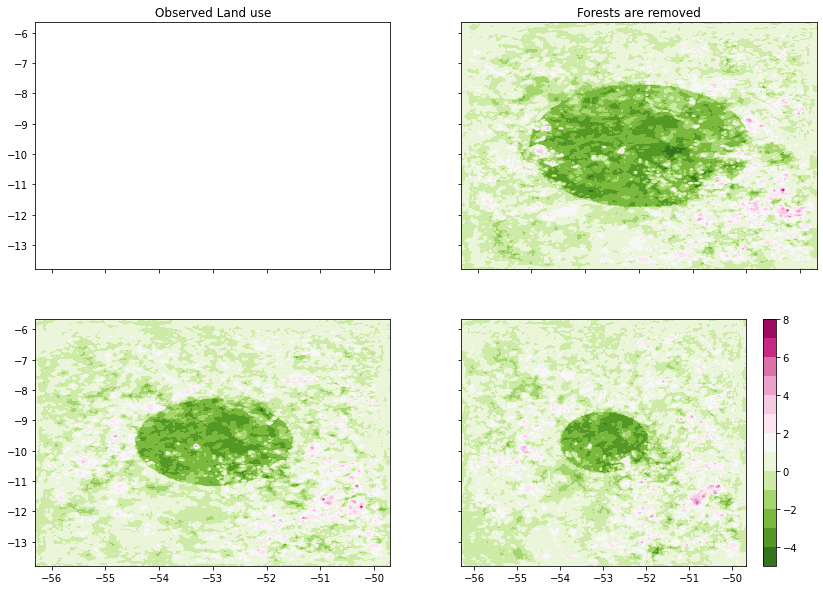

In [10]:
fig,axes = plt.subplots(2,2,figsize=(14,10),sharex=True,sharey=True)
axes = axes.ravel()
axes[0].contourf(lons,lats,ds0['TSK'][16,:,:]-273.15, levels=np.arange(-20,1,1),cmap='PiYG_r')
axes[1].contourf(lons,lats,ds1['TSK'][16,:,:]-ds0['TSK'][16,:,:], levels=np.arange(-5,9,1),cmap='PiYG_r')
axes[2].contourf(lons,lats,ds2['TSK'][16,:,:]-ds0['TSK'][16,:,:], levels=np.arange(-5,9,1),cmap='PiYG_r')
im=axes[3].contourf(lons,lats,ds3['TSK'][16,:,:]-ds0['TSK'][16,:,:], levels=np.arange(-5,9,1),cmap='PiYG_r')
fig.colorbar(im,ax=axes[3])
axes[0].set_title('Observed Land use')
axes[1].set_title('Forests are removed')


### Changes in daily range of TSK

Text(0.5, 1.0, 'Forests are removed')

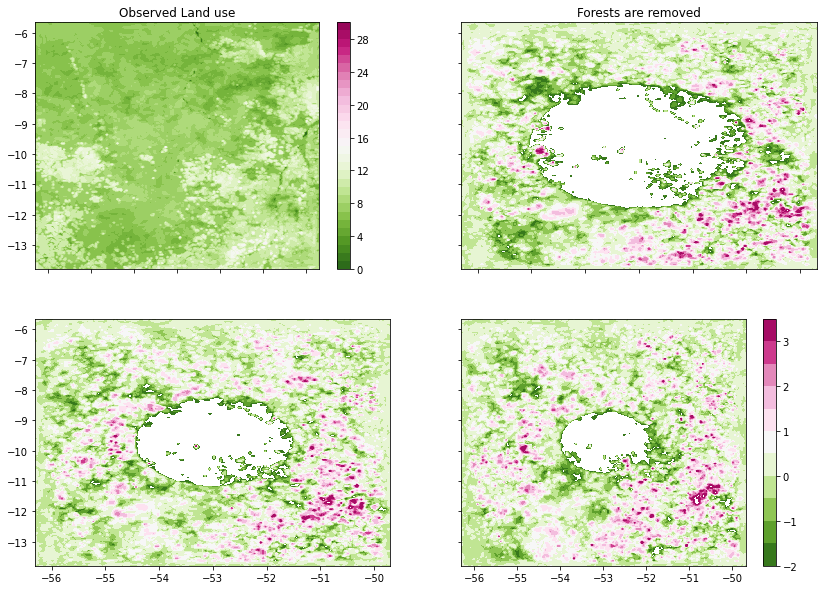

In [11]:
range0 = ds0['TSK'][16,:,:]-ds0['TSK'][10,:,:]
range1 = ds1['TSK'][16,:,:]-ds1['TSK'][10,:,:]
range2 = ds2['TSK'][16,:,:]-ds2['TSK'][10,:,:]
range3 = ds3['TSK'][16,:,:]-ds3['TSK'][10,:,:]


fig,axes = plt.subplots(2,2,figsize=(14,10),sharex=True,sharey=True)
axes = axes.ravel()
im=axes[0].contourf(lons,lats,range0, levels=np.arange(0,31,1),cmap='PiYG_r')
axes[1].contourf(lons,lats,range1-range0, levels=np.arange(-2,4,0.5),cmap='PiYG_r')
axes[2].contourf(lons,lats,range2-range0, levels=np.arange(-2,4,0.5),cmap='PiYG_r')
im1=axes[3].contourf(lons,lats,range3-range0, levels=np.arange(-2,4,.5),cmap='PiYG_r')
fig.colorbar(im,ax=axes[0])
fig.colorbar(im1,ax=axes[3])

axes[0].set_title('Observed Land use')
axes[1].set_title('Forests are removed')


### How many ensemble members are enough? 

In [26]:
path = '/jet/home/xjliu/Xingu_exp/Xingu_Cheyenne/'

    
with xarray.open_dataset(path+'post_processing/dif.TSK.bigclearing.multiday.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')
with xarray.open_dataset(path+'post_processing/dif.TSK.mediumclearing.multiday.nc',decode_times=False,
                         mask_and_scale='True') as ds2:
        print('ok')
with xarray.open_dataset(path+'post_processing/dif.TSK.smallclearing.multiday.nc',decode_times=False,
                         mask_and_scale='True') as ds3:
        print('ok')

with xarray.open_dataset(path+'Xingu_2003/wrfout_d01_2003-07-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,:,:]
    lons = ds['XLONG'][0,:,:]
    
fig,axes = plt.subplots(3,2,figsize=(14,12),sharex=True,sharey=True)
axes = axes.ravel()

for ii in range(6):
    im = axes[ii].contourf(lons,lats,ds1['TSK'][ii,16,:,:],levels=np.arange(-5,6,1),cmap='PiYG_r')

    fig.colorbar(im,ax=axes[ii],label='[mm]')

ok
ok
ok


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed backends via the ``engine`` parameter to xarray.open_dataset(), or installing additional IO dependencies:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

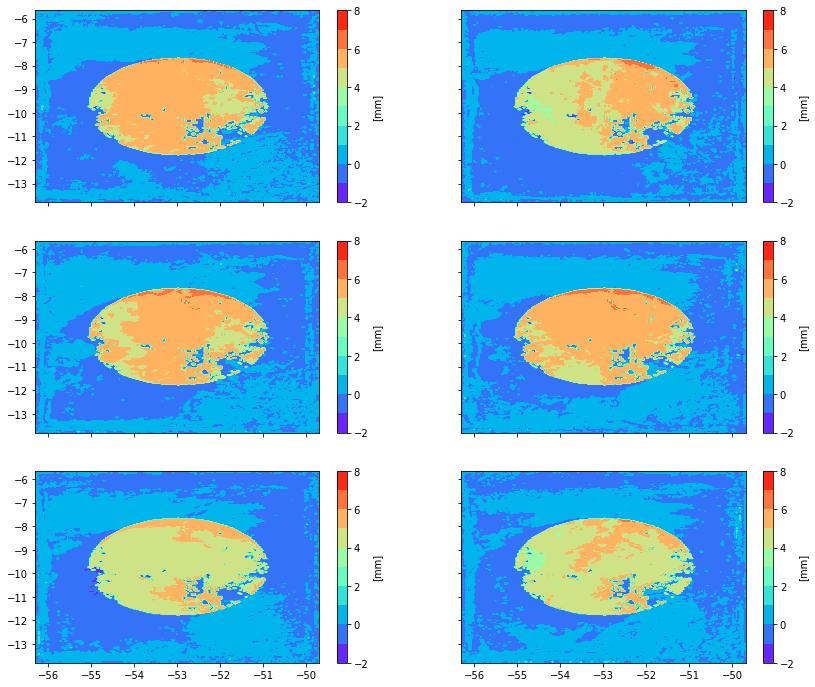

In [53]:
fig,axes = plt.subplots(3,2,figsize=(14,12),sharex=True,sharey=True)
axes = axes.ravel()

for ii in range(6):
    im = axes[ii].contourf(lons,lats,ds1['TSK'][ii,16,:,:],levels=np.arange(-2,9,1),cmap='rainbow')

    fig.colorbar(im,ax=axes[ii],label='[mm]')

### Evolution of precipitation and cloud fraction, using ensemble mean of all 19 members

In [42]:
precip_obs_ensmean = ds0['RAINNC'][:,:,:,:].mean(('record','south_north','west_east'))
precip_notrees_ensmean = ds1['RAINNC'][:,:,:,:].mean(('record','south_north','west_east'))
#del precip_obs
#del precip_notrees

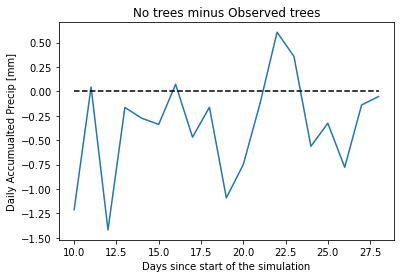

In [71]:
dif_ensmean = precip_notrees_ensmean - precip_obs_ensmean
dif_ensmean_daily = np.empty(20)
for ii in range(20):
    dif_ensmean_daily[ii]=dif_ensmean[ii*24] ## still accumulated value
plt.plot(np.arange(10,29),dif_ensmean_daily[1:]-dif_ensmean_daily[0:-1])
plt.title('No trees minus Observed trees')
plt.xlabel('Days since start of the simulation')
plt.ylabel('Daily Accumualted Precip [mm]')
plt.plot([10,28],[0,0],'--k')

### Check the precipitation change of "Forests2Savannah" simulations
### It is shown that the signal is there even after just a few days. 

ok
ok


Text(0.5, 1.0, 'Accumulated Precip change on the 30th day')

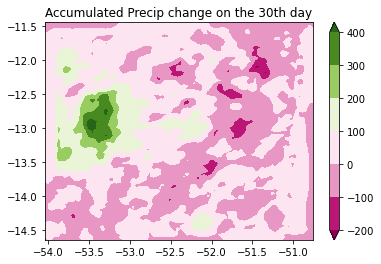

In [44]:
path = '/jet/home/xjliu/Tanguro_exp/post_processing/precip_Savannah/'
with xarray.open_dataset(path+'precip_ensmean_obs',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
with xarray.open_dataset(path+'precip_ensmean_notrees',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')

precip_notrees = ds1['RAINNC'][0,-1,:,:]
precip_obs = ds0['RAINNC'][0,-1,:,:]
dif = precip_notrees - precip_obs

plt.contourf(lons,lats,dif,cmap='PiYG',extend='both')
plt.colorbar()
#plt.title('Precip of Savannah minus Forest (mean of 20 ensemble members)')
plt.title('Accumulated Precip change on the 30th day')

ok
ok


Text(0.5, 1.0, 'Accumulated Precip change on the 10th day')

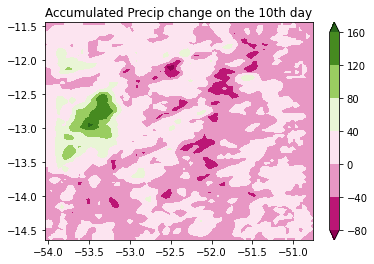

In [43]:
path = '/jet/home/xjliu/Tanguro_exp/post_processing/precip_Savannah/'
with xarray.open_dataset(path+'precip_9days_ensmean_obs',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
with xarray.open_dataset(path+'precip_9days_ensmean_notrees',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')

precip_notrees = ds1['RAINNC'][24*9-1,:,:]
precip_obs = ds0['RAINNC'][24*9-1,:,:]
dif = precip_notrees - precip_obs

plt.contourf(lons,lats,dif,cmap='PiYG',extend='both')
plt.colorbar()
plt.title('Accumulated Precip change on the 10th day')

### Precipitation change [Forests2Savannah] for the DRY season 

ok
ok


Text(0.5, 1.0, 'precip of Savannah minus Forest (mean of dry seasons of 2014-2016)')

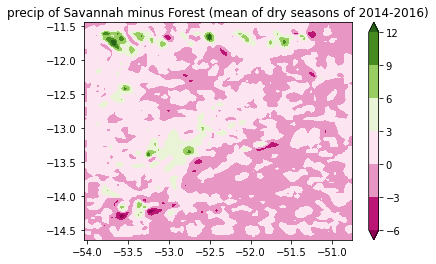

In [39]:
path = '/jet/home/xjliu/Tanguro_exp/post_processing/precip_dry/'
with xarray.open_dataset(path+'precip_dry_ensmean_obs.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
with xarray.open_dataset(path+'precip_dry_ensmean_notrees.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')

precip_notrees = ds1['RAINNC'][-1,:,:]
precip_obs = ds0['RAINNC'][-1,:,:]
dif = precip_notrees - precip_obs

plt.contourf(lons,lats,dif,cmap='PiYG',extend='both')
plt.colorbar()
plt.title('precip of Savannah minus Forest (mean of dry seasons of 2014-2016)')

### PRECIP change (Forest2Savannah) for the wet season, using real IC and BCs. 

ok
ok


Text(0.5, 1.0, 'Precip of Savannah minus Forest (mean of wet seasons of 2014-2016)')

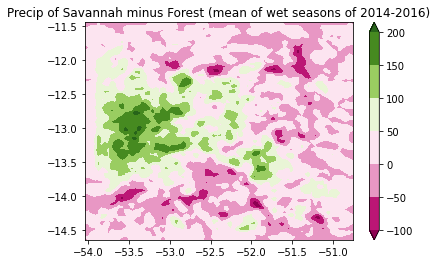

In [36]:
path = '/jet/home/xjliu/Tanguro_exp/post_processing/precip_wet/'
with xarray.open_dataset(path+'precip_wet_ensmean_obs.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
with xarray.open_dataset(path+'precip_wet_ensmean_notrees.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')

precip_notrees = ds1['RAINNC'][-1,:,:]
precip_obs = ds0['RAINNC'][-1,:,:]
dif = precip_notrees - precip_obs

plt.contourf(lons,lats,dif,cmap='PiYG',extend='both')
plt.colorbar()
plt.title('Precip of Savannah minus Forest (mean of wet seasons of 2014-2016)')